In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
X = np.linspace(0, 50, 501)

In [71]:
y = np.sin(X)

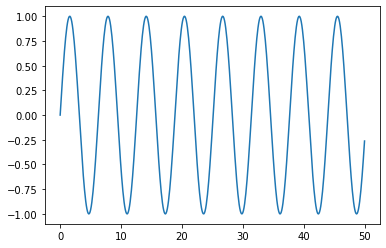

In [72]:
plt.plot(X, y);

In [73]:
df = pd.DataFrame(data=y, index=X, columns=['Sinus'])

In [74]:
df.head()

,Sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [75]:
len(df)

501

In [76]:
test_percent = 0.1

In [77]:
test_point = np.round(len(df) * test_percent)

In [78]:
test_point

50.0

In [79]:
test_ind = int(len(df) - test_point)

In [80]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [81]:
len(train) + len(test)

501

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [83]:
sc_train = scaler.fit_transform(train)
sc_test = scaler.transform(test)

In [84]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [112]:
length = 49
batch_size = 1

generator = TimeseriesGenerator(sc_train, sc_train, length=length, batch_size=batch_size)

In [86]:
len(sc_train), len(generator)

(451, 401)

In [87]:
X, y = generator[0]

In [90]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [91]:
y

array([[0.02053313]])

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [93]:
n_features = 1

In [94]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 127s 318ms/step - loss: 0.0072
Epoch 2/5
401/401 [==============================] - 121s 303ms/step - loss: 2.7565e-04
Epoch 3/5
401/401 [==============================] - 120s 300ms/step - loss: 3.2252e-04
Epoch 4/5
401/401 [==============================] - 121s 301ms/step - loss: 6.9499e-06
Epoch 5/5
401/401 [==============================] - 122s 305ms/step - loss: 3.4999e-05


<AxesSubplot:>

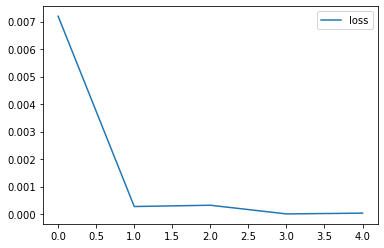

In [96]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [49]:
first_eval_batch.shape

(50, 1)

In [97]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [98]:
model.predict(first_eval_batch)

array([[0.9742743]], dtype=float32)

In [99]:
sc_test[0]

array([0.94955134])

In [104]:
test_predictions = []

first_eval_batch = sc_train[-length:]
current_batch  = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [105]:
test_predictions

[array([0.9742743], dtype=float32),
 array([0.9997511], dtype=float32),
 array([1.018417], dtype=float32),
 array([1.0287473], dtype=float32),
 array([1.0378658], dtype=float32),
 array([1.0331208], dtype=float32),
 array([1.0285845], dtype=float32),
 array([1.0245913], dtype=float32),
 array([1.0121367], dtype=float32),
 array([0.993419], dtype=float32),
 array([0.9746568], dtype=float32),
 array([0.94706523], dtype=float32),
 array([0.9121012], dtype=float32),
 array([0.8758407], dtype=float32),
 array([0.83768636], dtype=float32),
 array([0.7932702], dtype=float32),
 array([0.7506981], dtype=float32),
 array([0.70798254], dtype=float32),
 array([0.6595718], dtype=float32),
 array([0.6111482], dtype=float32),
 array([0.5620127], dtype=float32),
 array([0.50753635], dtype=float32),
 array([0.4535243], dtype=float32),
 array([0.40480068], dtype=float32),
 array([0.3532464], dtype=float32),
 array([0.30321872], dtype=float32),
 array([0.2599987], dtype=float32),
 array([0.21675873], dty

In [106]:
true_predictions = scaler.inverse_transform(test_predictions)

In [107]:
true_predictions[:10]

array([[0.94854271],
       [0.99949593],
       [1.03682745],
       [1.05748792],
       [1.07572465],
       [1.06623471],
       [1.05716224],
       [1.049176  ],
       [1.02426694],
       [0.98683183]])

In [108]:
test.head()

,Sinus
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [109]:
test['Predictions'] = true_predictions

/Users/loic.combis/Desktop/workspace/tf-bootcamp/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

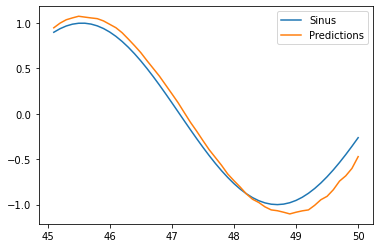

In [110]:
test.plot()

In [111]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [114]:
validation_generator = TimeseriesGenerator(sc_test, sc_test, length=length, batch_size=batch_size)

In [115]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 299s 743ms/step - loss: 0.0160 - val_loss: 1.1560e-04
Epoch 2/20
402/402 [==============================] - 291s 723ms/step - loss: 2.4905e-04 - val_loss: 2.8045e-05
Epoch 3/20
402/402 [==============================] - 301s 750ms/step - loss: 9.1390e-04 - val_loss: 1.2741e-04
Epoch 4/20
402/402 [==============================] - 294s 732ms/step - loss: 5.8039e-05 - val_loss: 7.9367e-08
Epoch 5/20
402/402 [==============================] - 292s 727ms/step - loss: 3.2919e-05 - val_loss: 1.8704e-08
Epoch 6/20
402/402 [==============================] - 291s 725ms/step - loss: 3.9119e-04 - val_loss: 2.7375e-06
Epoch 7/20
402/402 [==============================] - 287s 715ms/step - loss: 1.1067e-04 - val_loss: 9.3803e-06
